# Notebook 2

This notebook was used to understand the relationship between neighbourhood and price/rating score

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway

# Cleaning, Transforming then analyzing the data

In [9]:
listings = pd.read_csv('listings.csv')
listings = listings[['review_scores_rating',\
                     'neighbourhood_cleansed',\
                     'price']]

#Remove $ and conver to float
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype('float')

#Drop NaNs
listings = listings.dropna(subset=['review_scores_rating'])

#Deskew
listings['review_scores_rating_deskewed'] = stats.boxcox(listings['review_scores_rating'])[0]

#Computing ANOVA

col = 'review_scores_rating_deskewed'

Leather_District = listings[listings['neighbourhood_cleansed']=='Leather District'][col]
Roslindale = listings[listings['neighbourhood_cleansed']=='Roslindale'][col]
West_Roxbury = listings[listings['neighbourhood_cleansed']=='West Roxbury'][col]
South_Boston_Waterfront = listings[listings['neighbourhood_cleansed']=='South Boston Waterfront'][col]
Jamaica_Plain = listings[listings['neighbourhood_cleansed']=='Jamaica Plain'][col]
Longwood_Medical_Area =listings[listings['neighbourhood_cleansed']=='Longwood Medical Area'][col]
South_Boston = listings[listings['neighbourhood_cleansed']=='South Boston'][col]
North_End = listings[listings['neighbourhood_cleansed']=='North End'][col]
Fenway = listings[listings['neighbourhood_cleansed']=='Fenway'][col]
Beacon_Hill =listings[listings['neighbourhood_cleansed']=='Beacon Hill'][col]
South_End = listings[listings['neighbourhood_cleansed']=='South End'][col]
Bay_Village = listings[listings['neighbourhood_cleansed']=='Bay Village'][col]
Downtown = listings[listings['neighbourhood_cleansed']=='Downtown'][col]
Hyde_Park = listings[listings['neighbourhood_cleansed']=='Hyde Park'][col]
Chinatown = listings[listings['neighbourhood_cleansed']=='Chinatown'][col]
Back_Bay = listings[listings['neighbourhood_cleansed']=='Back Bay'][col]
Brighton = listings[listings['neighbourhood_cleansed']=='Brighton'][col]
Allston = listings[listings['neighbourhood_cleansed']=='Allston'][col]
Dorchester = listings[listings['neighbourhood_cleansed']=='Allston'][col]
Charlestown = listings[listings['neighbourhood_cleansed']=='Charlestown'][col]
Mattapan = listings[listings['neighbourhood_cleansed']=='Mattapan'][col]
East_Boston = listings[listings['neighbourhood_cleansed']=='East Boston'][col]
Mission_Hill = listings[listings['neighbourhood_cleansed']=='Mission Hill'][col]
Roxbury= listings[listings['neighbourhood_cleansed']=='Roxbury'][col]
West_End = listings[listings['neighbourhood_cleansed']=='West End'][col]

f_oneway(Leather_District, Roslindale, West_Roxbury, South_Boston_Waterfront,\
         Jamaica_Plain, Longwood_Medical_Area, South_Boston, North_End,\
         Fenway, Beacon_Hill, South_End, Bay_Village, Downtown,Hyde_Park,\
         Chinatown, Back_Bay, Brighton, Allston, Dorchester, Charlestown,\
        Mattapan, East_Boston, Mission_Hill, Roxbury, West_End)

C:\Users\DanielJoseph.Onsiter\AppData\Local\Temp\ipykernel_21848\765145058.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype('float')


F_onewayResult(statistic=4.755978525290719, pvalue=2.274000158637548e-13)

#### Observations

ANOVA gives a p-score of 2E-13, which means that there is a 2E-11% chance that the review_scores_rating_deskewed belong to the same population. This implies that it is almost certain that review_scores_rating is dependent on neighbourhood. 

It is important to note that ANOVA is only valid for data that is normally distributed. review_scores_rating_deskewed follows an approximate normal distribution, but this is only because it has been processed to be this way. There is always a possibility that the above result was artificially created by transforming the data using the box-cox method, and as such the ANOVA metric should not be used in this case to make the final conclusion

# Determining the top 5 and bottom 5 neighbours ranked by review_scores_rating_deskewed

In [11]:
#Sort neighbours by deskewed review scores
listings.groupby('neighbourhood_cleansed').mean().sort_values(by='review_scores_rating_deskewed')

,review_scores_rating,price,review_scores_rating_deskewed
neighbourhood_cleansed,,,
Mission Hill,87.695122,107.804878,5.855893e+12
Roxbury,89.803419,135.905983,6.066090e+12
East Boston,90.272059,118.830882,6.201155e+12
Dorchester,89.280000,91.875556,6.239148e+12
Mattapan,91.000000,76.111111,6.242449e+12
West End,90.333333,212.407407,6.362035e+12
Fenway,89.417112,189.320856,6.373039e+12
Back Bay,91.531646,237.164557,6.703408e+12
Allston,90.164835,105.417582,6.826821e+12


Bottom 5 neighbourhoods: Mission Hill, Roxbury, East Boston, Dorchester, Mattapan

Top 5 neighbourhoods: Leather District, West Roxbury, Roslindale, South Boston Waterfront, Jamaica Plain

<Axes: xlabel='neighbourhood_cleansed', ylabel='review_scores_rating_deskewed'>

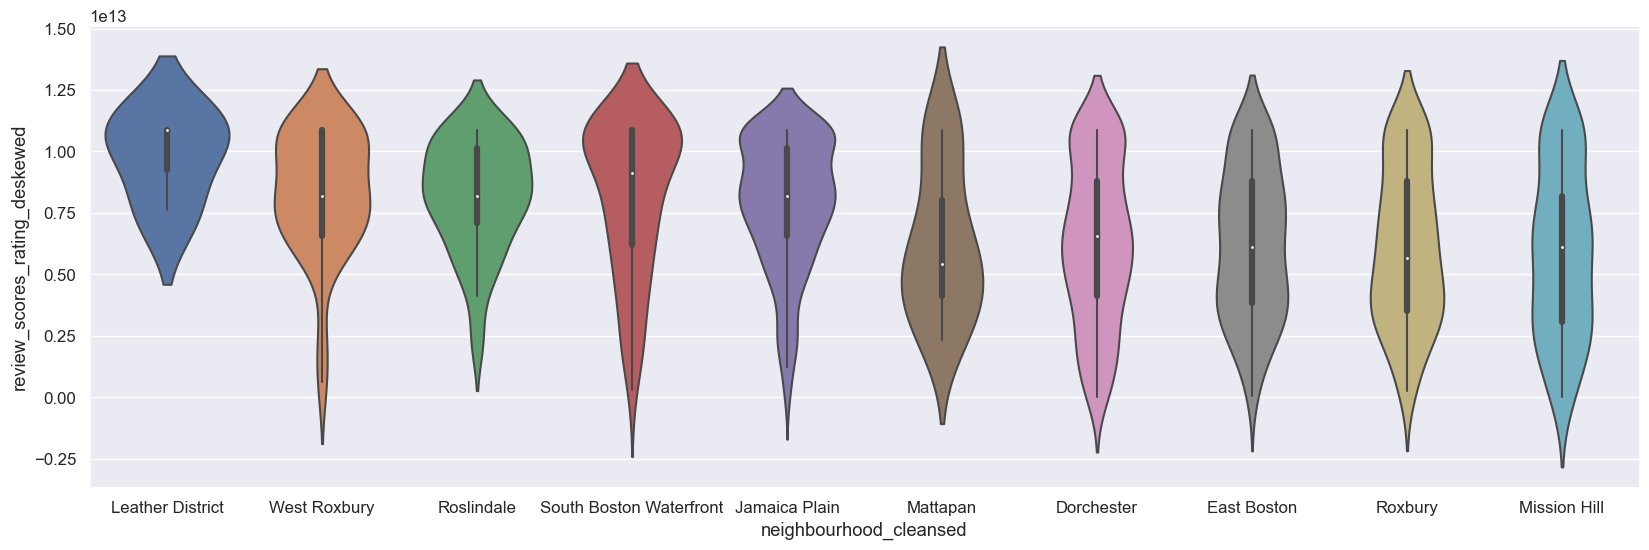

In [15]:
#Plotting violin plots for the top 5 and bottom 5 neighbourhoods
neighbourhoods = ['Leather District','West Roxbury','Roslindale','South Boston Waterfront','Jamaica Plain',\
                 'Mattapan','Dorchester','East Boston','Roxbury','Mission Hill']
tmp = listings[listings['neighbourhood_cleansed'].isin(neighbourhoods)]
plt.figure(figsize=(20,6))
sns.set(font_scale = 1.1)
sns.violinplot(y='review_scores_rating_deskewed', 
                x='neighbourhood_cleansed', 
                data=tmp,
                order = neighbourhoods)

#### Observation
The distributions for the top 5 and bottom 5 neighbourhoods are quite different in shape (sarcophagus/vase shape vs pear shape) 

# Looking at the relationship between neighbourhood and price

In [19]:
def rm_outliers(df,col_name):
    '''
        Input: 
        df - dataframe with numerical values
        col_name - column with outliers
        
        output
        df - dataframe with outliers removed in col_name
        
        Description:
        Removes values which are > 2 * the standard deviation
        
    '''
    threshold = 2
    mean_col = df[col_name].mean()
    std_col  = df[col_name].std()
    df = df[abs(df[col_name] - mean_col)/std_col <= threshold]
    
    return df

In [23]:
listings = pd.read_csv('listings.csv')
listings = listings[['review_scores_rating',\
                     'neighbourhood_cleansed',\
                     'price']]

#Cleaning
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype('float')

#Remove outliers
listings = rm_outliers(listings,'price')

#Computing ANOVA
col = 'price'
Leather_District = listings[listings['neighbourhood_cleansed']=='Leather District'][col]
Roslindale = listings[listings['neighbourhood_cleansed']=='Roslindale'][col]
West_Roxbury = listings[listings['neighbourhood_cleansed']=='West Roxbury'][col]
South_Boston_Waterfront = listings[listings['neighbourhood_cleansed']=='South Boston Waterfront'][col]
Jamaica_Plain = listings[listings['neighbourhood_cleansed']=='Jamaica Plain'][col]
Longwood_Medical_Area =listings[listings['neighbourhood_cleansed']=='Longwood Medical Area'][col]
South_Boston = listings[listings['neighbourhood_cleansed']=='South Boston'][col]
North_End = listings[listings['neighbourhood_cleansed']=='North End'][col]
Fenway = listings[listings['neighbourhood_cleansed']=='Fenway'][col]
Beacon_Hill =listings[listings['neighbourhood_cleansed']=='Beacon Hill'][col]
South_End = listings[listings['neighbourhood_cleansed']=='South End'][col]
Bay_Village = listings[listings['neighbourhood_cleansed']=='Bay Village'][col]
Downtown = listings[listings['neighbourhood_cleansed']=='Downtown'][col]
Hyde_Park = listings[listings['neighbourhood_cleansed']=='Hyde Park'][col]
Chinatown = listings[listings['neighbourhood_cleansed']=='Chinatown'][col]
Back_Bay = listings[listings['neighbourhood_cleansed']=='Back Bay'][col]
Brighton = listings[listings['neighbourhood_cleansed']=='Brighton'][col]
Allston = listings[listings['neighbourhood_cleansed']=='Allston'][col]
Dorchester = listings[listings['neighbourhood_cleansed']=='Allston'][col]
Charlestown = listings[listings['neighbourhood_cleansed']=='Charlestown'][col]
Mattapan = listings[listings['neighbourhood_cleansed']=='Mattapan'][col]
East_Boston = listings[listings['neighbourhood_cleansed']=='East Boston'][col]
Mission_Hill = listings[listings['neighbourhood_cleansed']=='Mission Hill'][col]
Roxbury= listings[listings['neighbourhood_cleansed']=='Roxbury'][col]
West_End = listings[listings['neighbourhood_cleansed']=='West End'][col]

from scipy.stats import f_oneway
f_oneway(Leather_District, Roslindale, West_Roxbury, South_Boston_Waterfront,\
         Jamaica_Plain, Longwood_Medical_Area, South_Boston, North_End,\
         Fenway, Beacon_Hill, South_End, Bay_Village, Downtown,Hyde_Park,\
         Chinatown, Back_Bay, Brighton, Allston, Dorchester, Charlestown,\
        Mattapan, East_Boston, Mission_Hill, Roxbury, West_End)

C:\Users\DanielJoseph.Onsiter\AppData\Local\Temp\ipykernel_21848\249880203.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype('float')


F_onewayResult(statistic=49.92764216289445, pvalue=1.4557115189199983e-202)

#### Observation
ANOVA p-score once again implies that the price ditributions across neighbourhoods is not the same

<Axes: xlabel='neighbourhood_cleansed', ylabel='price'>

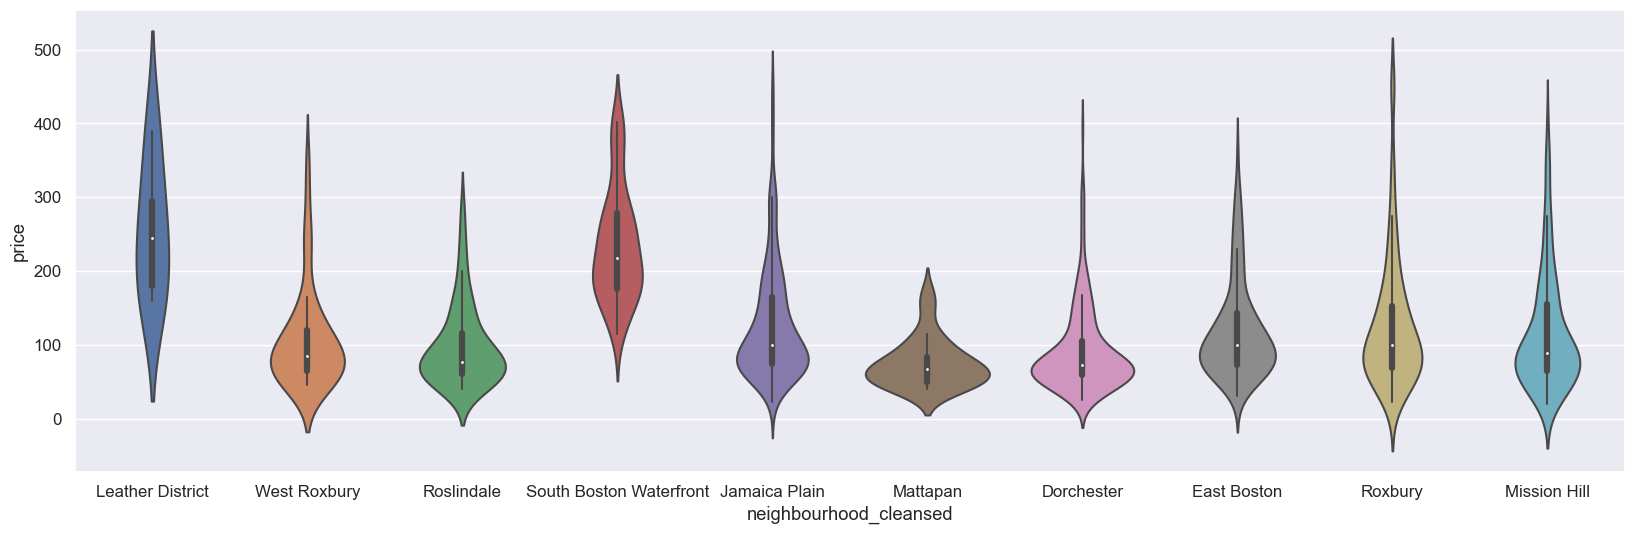

In [24]:
#Plotting violin plots of price for the previously selected 10 neighbourhoods
neighbourhoods = ['Leather District','West Roxbury','Roslindale','South Boston Waterfront','Jamaica Plain',\
                 'Mattapan','Dorchester','East Boston','Roxbury','Mission Hill']
tmp = listings[listings['neighbourhood_cleansed'].isin(neighbourhoods)]
plt.figure(figsize=(20,6))
sns.violinplot(y='price', 
                x='neighbourhood_cleansed', 
                data=tmp,
                order = neighbourhoods)

#### Observation
Interestingly, West Roxbury, Roslindale and Jamaica plain have rather low listing prices despite being amont the top 5 highest rated neighbourhoods. Perhaps it is the value-for-money of listings in these neighbourhoods that is contributing to their high ratings scores